# Software vs Hardware time comparison %.

In [1]:
import paho.mqtt.client as mqttClient
import time
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from cloudant.client import Cloudant
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
import mpl_toolkits
import pickle
from pushetta import Pushetta
from pynq import Overlay
from pynq import DefaultIP
import pynq.lib.dma
from pynq import Xlnk
from scipy import stats as ss


xlnk = Xlnk()

overlay = Overlay('/home/xilinx/pynq/overlays/sort/sort.bit')

dma = overlay.mult_dma
    
data_train = pd.read_csv("CSV/frec.csv")   

"""
open('CSV/frec.csv', 'w').close()
fil= open("CSV/frec.csv","w+")
fil.write("frecx,ampx,frecy,ampy,frecz,ampz,riskx,risky,riskz\r\n")
fil.close()
"""

labelsx = data_train['riskx']
labelsy = data_train['risky']
labelsz = data_train['riskz']

arrfrecx= data_train['frecx']
arrfrecy= data_train['frecy']
arrfrecz= data_train['frecz']
arrampx = data_train['ampx']
arrampy = data_train['ampy']
arrampz = data_train['ampz']

mfrecx= 0
mfrecy= 0
mfrecz= 0
mampx = 0
mampy = 0
mampz = 0

trainx = data_train.drop(['frecy','frecz','ampy','ampz','riskx','risky','riskz'],axis=1)
trainy = data_train.drop(['frecx','frecz','ampx','ampz','riskx','risky','riskz'],axis=1)
trainz = data_train.drop(['frecx','frecy','ampx','ampy','riskx','risky','riskz'],axis=1)

x_trainx , dontcare1x , y_trainx , dontcare2x = train_test_split(trainx , labelsx , test_size = 1,random_state =2)
x_trainy , dontcare1y , y_trainy , dontcare2y = train_test_split(trainy , labelsy , test_size = 1,random_state =2)
x_trainz , dontcare1z , y_trainz , dontcare2z = train_test_split(trainz , labelsz , test_size = 1,random_state =2)

filenamex = 'Models/bridgex.sav'
filenamey = 'Models/bridgey.sav'
filenamez = 'Models/bridgez.sav'    

modelx = pickle.load(open(filenamex, 'rb'))
modely = pickle.load(open(filenamey, 'rb'))
modelz = pickle.load(open(filenamez, 'rb'))

"""
modelx.fit(x_trainx, y_trainx)
print("Model 1 Fit")
modely.fit(x_trainy, y_trainy)
print("Model 2 Fit")
modelz.fit(x_trainz, y_trainz)
print("Model 3 Fit")
"""

in_buffer1 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
in_buffer2 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
in_buffer3 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
in_buffer4 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
in_buffer5 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
in_buffer6 = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)
out_buffer = xlnk.cma_array(shape=(len(labelsx),), dtype=np.float32)

for i in range(1,len(labelsx)-1):
    in_buffer1[i]=arrfrecx[i]
    in_buffer2[i]=arrfrecy[i]
    in_buffer3[i]=arrfrecz[i]
    in_buffer4[i]=arrampx[i]
    in_buffer5[i]=arrampy[i]
    in_buffer6[i]=arrampz[i]

tic = time.clock()
dma.sendchannel.transfer(in_buffer1)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max X Frecuency = "+str(out_buffer[len(out_buffer)-1]))
overlay = Overlay('/home/xilinx/pynq/overlays/sort/multi.bit')
dma = overlay.mult_dma
dma.sendchannel.transfer(in_buffer2)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max Y Frecuency = "+str(out_buffer[len(out_buffer)-1]))
overlay = Overlay('/home/xilinx/pynq/overlays/sort/multi.bit')
dma = overlay.mult_dma
dma.sendchannel.transfer(in_buffer3)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max Z Frecuency = "+str(out_buffer[len(out_buffer)-1]))
overlay = Overlay('/home/xilinx/pynq/overlays/sort/multi.bit')
dma = overlay.mult_dma
dma.sendchannel.transfer(in_buffer4)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max X Amplitude = "+str(out_buffer[len(out_buffer)-1]))
overlay = Overlay('/home/xilinx/pynq/overlays/sort/multi.bit')
dma = overlay.mult_dma
dma.sendchannel.transfer(in_buffer5)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max Y Amplitude = "+str(out_buffer[len(out_buffer)-1]))
overlay = Overlay('/home/xilinx/pynq/overlays/sort/multi.bit')
dma = overlay.mult_dma
dma.sendchannel.transfer(in_buffer6)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print("Max Z Amplitude = "+str(out_buffer[len(out_buffer)-1]))
toc = time.clock()
print(" ")
print("Hardware Processing Time")
time1=toc-tic
print(str(time1)+" Seconds")

tic = time.clock()
for i in range (len(arrfrecx)-1):
    if (mfrecx<arrfrecx[i]):
        mfrecx=arrfrecx[i]
for i in range (len(arrfrecy)-1):
    if (mfrecy<arrfrecy[i]):
        mfrecy=arrfrecy[i]    
for i in range (len(arrfrecz)-1):
    if (mfrecz<arrfrecz[i]):
        mfrecz=arrfrecz[i]
for i in range (len(arrampx)-1):
    if (mampx<arrampx[i]):
        mampx=arrampx[i]
for i in range (len(arrampy)-1):
    if (mampy<arrampy[i]):
        mampy=arrampy[i]
for i in range (len(arrampz)-1):
    if (mampz<arrampz[i]):
        mampz=arrampz[i]
        
print(" ")
print(" ")
print("Max X Frecuency = "+str(mfrecx))
print("Max Y Frecuency = "+str(mfrecy))
print("Max Z Frecuency = "+str(mfrecz))
print("Max X Amplitude = "+str(mampx))
print("Max Y Amplitude = "+str(mampy))
print("Max Z Amplitude = "+str(mampz))
toc = time.clock()
print(" ")
print("Software Processing Time")
time2=toc-tic
print(str(time2) + " Seconds")

print(" ")
print(" ")
print("Hardware time improvement")
time3=((abs(time2-time1)/(time1)))*100
print(str(time3)+" %")

datax = [[mfrecx,mampx]]
dfx = pd.DataFrame(datax,columns=['frecx','ampx'])
datay = [[mfrecy,mampy]]
dfy = pd.DataFrame(datay,columns=['frecy','ampy'])
dataz = [[mfrecz,mampz]]
dfz = pd.DataFrame(dataz,columns=['frecz','ampz'])

y_predx = modelx.predict(dfx)
y_predy = modely.predict(dfy)
y_predz = modelz.predict(dfz)

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Max X Frecuency = 0.0284281
Max Y Frecuency = 0.0
Max Z Frecuency = 0.090301
Max X Amplitude = 0.390368
Max Y Amplitude = 0.129267
Max Z Amplitude = 0.210398
 
Hardware Processing Time
1.8568380000000033 Seconds
 
 
Max X Frecuency = 0.0284281
Max Y Frecuency = 0
Max Z Frecuency = 0.090301
Max X Amplitude = 0.390368
Max Y Amplitude = 0.129267
Max Z Amplitude = 0.210398
 
Software Processing Time
35.611771 Seconds
 
 
Hardware time improvement
1817.8717260202525 %


# Software vs Hardware time comparison analysis.

In [2]:
from pynq import Overlay
from pynq import DefaultIP
import pynq.lib.dma
from pynq import Xlnk
import numpy as np
import time
import random
import pandas as pd
from scipy.fftpack import fft
from scipy import stats as ss

overlay = Overlay('/home/xilinx/pynq/overlays/sort/sort.bit')
dma = overlay.mult_dma

y1= np.zeros((1000,), dtype=np.float32)
y2= np.zeros((1000,), dtype=np.float32)
x = np.zeros((1000,), dtype=np.float32)

for number in range(2,1000):

    a= np.zeros((number,), dtype=np.float32)
    x[number] = number
    xlnk = Xlnk()
    in_buffer = xlnk.cma_array(shape=(number,), dtype=np.float32)
    out_buffer = xlnk.cma_array(shape=(number,), dtype=np.float32)

    for i in range(len(in_buffer+1)):
        in_buffer[i] = 0
        a[i] = in_buffer[i]

    for i in range(number):
        in_buffer[i] = random.uniform(0,1000)
        a[i] = in_buffer[i]

    tic = time.clock()
    dma.sendchannel.transfer(in_buffer)
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    toc = time.clock()
    y1[number] = toc - tic

    tic = time.clock()
    search=0
    for  i in range(number-1):
        if search < a[i]:
            search=a[i]
    toc = time.clock()
    y2[number] = toc - tic


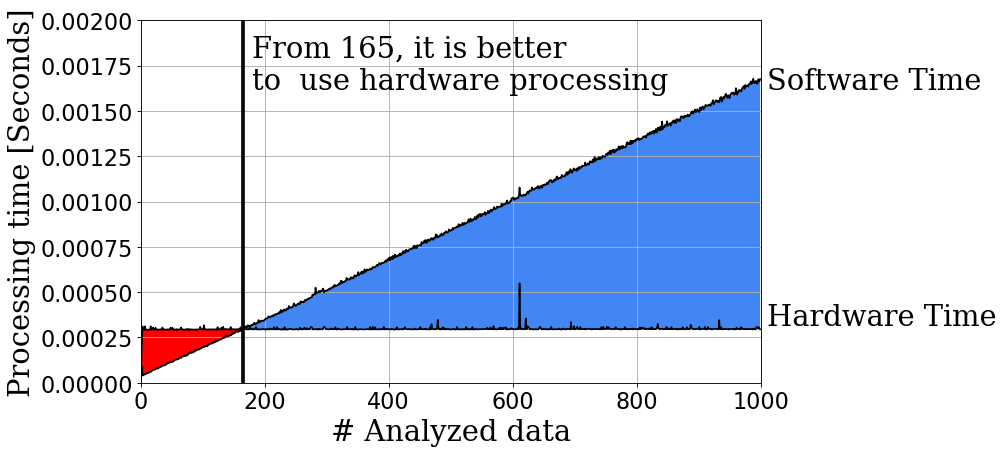

In [7]:
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 26,
        }

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y1,"k",x,y2,"k")
plt.axis([0, 1000, 0, 0.002])
plt.xlabel('# Analyzed data',fontdict=font)
plt.ylabel("Processing time [Seconds]",fontdict=font)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.text(1010, 0.00162,'Software Time',fontdict=font)
plt.text(180, 0.00162,'From 165, it is better \nto  use hardware processing',fontdict=font)
plt.text(1010, 0.00032,'Hardware Time',fontdict=font)
plt.axvline(x=164,color='k')
plt.axvline(x=165,color='k')
plt.axvline(x=166,color='k')
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='#4286f4', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
plt.grid()
plt.show() 

# Frecuency vs Amplitude

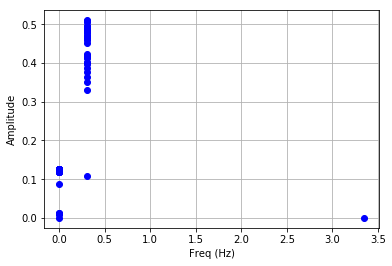

In [45]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train = pd.read_csv("CSV/frec.csv")  

x1= data_train['frecx']
x2= data_train['frecy']
x3= data_train['frecz']
y1 = data_train['ampx']
y2 = data_train['ampy']
y3 = data_train['ampz']


plt.plot(x1, y1, 'bo')
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Data for a three-dimensional line